##### source: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [13]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

##### Preprocessing Input data
######  這一組數據的答案是： $y=0.2x+4+\epsilon$

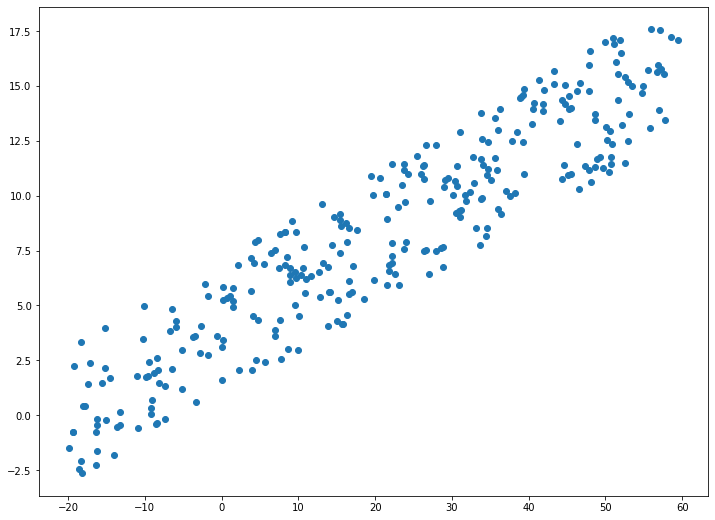

In [14]:
data = pd.read_csv('linear.regression.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 2]
plt.scatter(X, Y)
plt.show()

In [15]:
# initial guess
m = -5
c = -5

In [16]:
X

0      12.699206
1     -16.338590
2      16.566408
3      47.881772
4      15.416405
         ...    
295    16.612363
296    30.961347
297    51.666517
298    14.590073
299    35.088638
Name: X, Length: 300, dtype: float64

In [17]:
X[0:5]

0    12.699206
1   -16.338590
2    16.566408
3    47.881772
4    15.416405
Name: X, dtype: float64

In [18]:
# 這是一個方便的指令；一個指令完成一個 series 的運算
tempY = m*X + c
tempY[0:5]

0    -68.496031
1     76.692950
2    -87.832039
3   -244.408862
4    -82.082027
Name: X, dtype: float64

In [19]:
Y[0:5]

0     6.539841
1    -0.767718
2     5.513282
3    14.776354
4     7.383281
Name: Y2, dtype: float64

In [20]:
delta = Y - tempY
delta[0:5]

0     75.035872
1    -77.460668
2     93.345321
3    259.185216
4     89.465308
dtype: float64

In [21]:
type(delta)

pandas.core.series.Series

In [22]:
# 一般的 Python list 沒有這樣便利
list1 = [1, 2, 3, 4]
list2 = [2, 4, 6, 8]
#list1 * list2  # 錯誤指令

In [23]:
series1 = pd.Series(list1)
series2 = pd.Series(list2)
type(series1)

pandas.core.series.Series

In [24]:
print("the inner product")
print(series1*series2)
print("the sum")
print(sum(series1*series2))

the inner product
0     2
1     8
2    18
3    32
dtype: int64
the sum
60


In [25]:
# Building the model

L = 0.001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # 相當於做 X_1 的微分，但是這裡依賴數據的誤差資訊
    D_c = (-2/n) * sum(Y - Y_pred)  # 相當於做 X_0 的微分，但是這裡依賴數據的誤差資訊；X_0=1所以不必乘
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    Y_pred = m*X + c

print (m, c)

0.20668296612475454 3.900158931246714


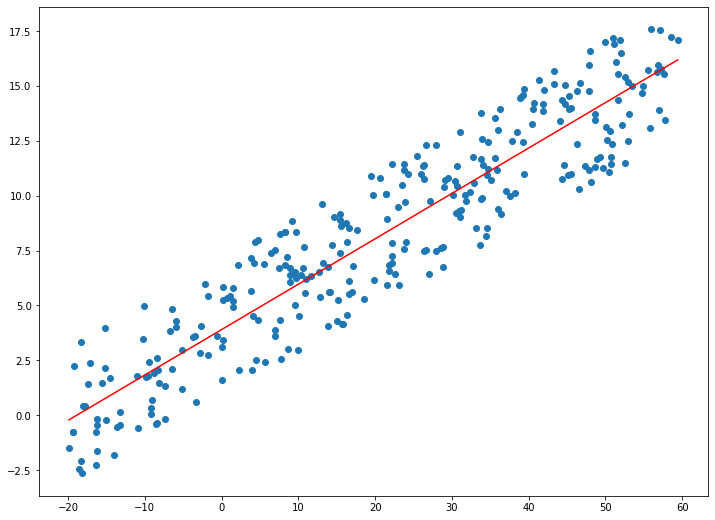

In [26]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()